In [133]:
import matplotlib.pyplot as plt
from mxnet import nd, autograd
import random

In [134]:
def generate_data(w, b, num):
    X = nd.random.normal(shape=(num, len(w)))
    y = nd.dot(X, w) + b
    y += nd.random.normal(scale=0.01, shape=(y.shape))
    return X, y    

In [135]:
def plotter(X, y):
    plt.scatter(X, y, 1)
    plt.show()

In [136]:
def model(w, b, X):
    return nd.dot(X, w) + b

In [137]:
def loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape))**2)/2

In [138]:
def data_iter(X, y, batch_size):
    indices = list(range(len(y )))
    random.shuffle(indices)
    for i in range(0, len(y), batch_size):
        j = nd.array(indices[i: min(i+batch_size, len(y))])
        yield X.take(j), y.take(j)


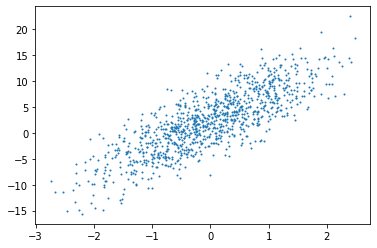

In [139]:
true_w = nd.array([3.4, 5])
true_b = 2.5
X, y = generate_data(true_w, true_b, 1000)
plotter(X[:, 1].asnumpy(), y.asnumpy())

In [145]:
w = nd.random.normal(scale=0.01, shape=(X.shape[1], 1))
b = nd.zeros(1)
print(w)
w.attach_grad()
b.attach_grad()
epochs = 10
batch_size = 10
lr = 0.1


[[-0.0042419 ]
 [ 0.00958158]]
<NDArray 2x1 @cpu(0)>


In [146]:
for epoch in range(epochs):
    for features, labels in data_iter(X, y, batch_size):
        with autograd.record():
            y_hat = model(w, b, features)
            l = loss(y_hat, labels)
        l.backward()
        w[:] -= (lr / batch_size) * w.grad
        b[:] -= (lr / batch_size) * b.grad
    epoch_loss = loss(model(w, b, X), y)
    print("Epoch {} Loss: {}".format(epoch, epoch_loss.mean().asscalar()))

Epoch 0 Loss: 4.877576066064648e-05
Epoch 1 Loss: 4.792332401848398e-05
Epoch 2 Loss: 5.0487014959799126e-05
Epoch 3 Loss: 4.844959403271787e-05
Epoch 4 Loss: 4.912050280836411e-05
Epoch 5 Loss: 4.8942867579171434e-05
Epoch 6 Loss: 4.864722359343432e-05
Epoch 7 Loss: 4.856755185755901e-05
Epoch 8 Loss: 4.9007012421498075e-05
Epoch 9 Loss: 4.856191299040802e-05


In [147]:
print("Error in w is:", (true_w-w).asnumpy())

Error in w is: [[ 9.4437599e-04  1.6009443e+00]
 [-1.5994844e+00  5.1546097e-04]]
